In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2015-01-15"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2015_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-01-15   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175    ÏÇ¨ÌïòÍµ¨  11993    ÏÇ¨ÌïòÍµ¨   
1   2015-01-15     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6290    ÏÇ¨ÌïòÍµ¨   6550    ÏÇ¨ÌïòÍµ¨   
2   2015-01-15     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3290    ÏÇ¨ÌïòÍµ¨   3300    ÏÇ¨ÌïòÍµ¨   
3   2015-01-15    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7522    ÏÇ¨ÌïòÍµ¨   8410    ÏÇ¨ÌïòÍµ¨   
4   2015-01-15     ÎåÄÌåå                      1.0„éè   2625    ÏÇ¨ÌïòÍµ¨   2763    ÏÇ¨ÌïòÍµ¨   
5   2015-01-15   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9000    ÏÇ¨ÌïòÍµ¨  13450    ÏÇ¨ÌïòÍµ¨   
6   2015-01-15     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4200    ÏÇ¨ÌïòÍµ¨   4200    ÏÇ¨ÌïòÍµ¨   
7   2015-01-15     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634    ÏÇ¨ÌïòÍµ¨    634    ÏÇ¨ÌïòÍµ¨   
8   2015-01-15     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1260    ÏÇ¨ÌïòÍµ¨   1350    ÏÇ¨ÌïòÍµ¨   
9   2015-01-15      Î¨¥                   2.0„éè 1Í∞ú   1370    ÏÇ¨ÌïòÍµ¨   1394    ÏÇ¨ÌïòÍµ¨   
10  2015-01-15    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÌïòÍµ¨   3590    ÏÇ¨ÌïòÍµ¨   
11  2015-01-15     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2475    ÏÇ¨ÌïòÍµ¨   2980    ÏÇ¨ÌïòÍµ¨   
12  2015-01-15      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  14970    ÏÇ¨ÌïòÍµ¨  23700    ÏÇ¨ÌïòÍµ¨   
13  2015-01-15     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1500    ÏÇ¨ÌïòÍµ¨   2590    ÏÇ¨ÌïòÍµ¨   
14  2015-01-15  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   5590    ÏÇ¨ÌïòÍµ¨   6500    ÏÇ¨ÌïòÍµ¨   
15  2015-01-15   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
16  2015-01-15     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15179    ÏÇ¨ÌïòÍµ¨  15600    ÏÇ¨ÌïòÍµ¨   
17  2015-01-15    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1980    ÏÇ¨ÌïòÍµ¨   2250    ÏÇ¨ÌïòÍµ¨   
18  2015-01-15     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1600    ÏÇ¨ÌïòÍµ¨   1630    ÏÇ¨ÌïòÍµ¨   
19  2015-01-15     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1080    ÏÇ¨ÌïòÍµ¨   1090    ÏÇ¨ÌïòÍµ¨   
20  2015-01-15    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  36000    ÏÇ¨ÌïòÍµ¨  36000    ÏÇ¨ÌïòÍµ¨   
21  2015-01-15      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45000    ÏÇ¨ÌïòÍµ¨  51900    ÏÇ¨ÌïòÍµ¨   
22  2015-01-15     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1108    ÏÇ¨ÌïòÍµ¨   1470    ÏÇ¨ÌïòÍµ¨   
23  2015-01-15     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÌïòÍµ¨    730    ÏÇ¨ÌïòÍµ¨   
24  2015-01-15    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6590    ÏÇ¨ÌïòÍµ¨   6600    ÏÇ¨ÌïòÍµ¨   
25  2015-01-15   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2395    ÏÇ¨ÌïòÍµ¨   2430    ÏÇ¨ÌïòÍµ¨   
26  2015-01-15     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2070    ÏÇ¨ÌïòÍµ¨   2511    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   3818   46.7%  10,084  
1    260   4.13%   6,420  
2     10    0.3%   3,295  
3    888  11.81%   7,966  
4    138   5.26%   2,694  
5   4450  49.44%  11,225  
6      0    0.0%   4,200  
7      0    0.0%     634  
8     90   7.14%   1,305  
9     24   1.75%   1,382  
10   160   4.66%   3,510  
11   505   20.4%   2,728  
12  8730  58.32%  19,335  
13  1090  72.67%   2,045  
14   910  16.28%   6,045  
15   440   3.18%  14,070  
16   421   2.77%  15,390  
17   270  13.64%   2,115  
18    30   1.88%   1,615  
19    10   0.93%   1,085  
20     0    0.0%  36,000  
21  6900  15.33%  48,450  
22   362  32.67%   1,289  
23     0    0.0%     730  
24    10   0.15%   6,595  
25    35   1.46%   2,413  
26   441   21.3%   2,291

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2015-04-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2015_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-04-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÌïòÍµ¨  11993    ÏÇ¨ÌïòÍµ¨   
1   2015-04-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6290    ÏÇ¨ÌïòÍµ¨   6550    ÏÇ¨ÌïòÍµ¨   
2   2015-04-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2990    ÏÇ¨ÌïòÍµ¨   3300    ÏÇ¨ÌïòÍµ¨   
3   2015-04-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6017    ÏÇ¨ÌïòÍµ¨   8410    ÏÇ¨ÌïòÍµ¨   
4   2015-04-09     ÎåÄÌåå                      1.0„éè   2538    ÏÇ¨ÌïòÍµ¨   2725    ÏÇ¨ÌïòÍµ¨   
5   2015-04-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8750    ÏÇ¨ÌïòÍµ¨   9950    ÏÇ¨ÌïòÍµ¨   
6   2015-04-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4200    ÏÇ¨ÌïòÍµ¨   4200    ÏÇ¨ÌïòÍµ¨   
7   2015-04-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634    ÏÇ¨ÌïòÍµ¨    640    ÏÇ¨ÌïòÍµ¨   
8   2015-04-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1260    ÏÇ¨ÌïòÍµ¨   1350    ÏÇ¨ÌïòÍµ¨   
9   2015-04-09      Î¨¥                   2.0„éè 1Í∞ú   1470    ÏÇ¨ÌïòÍµ¨   1517    ÏÇ¨ÌïòÍµ¨   
10  2015-04-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÌïòÍµ¨   3590    ÏÇ¨ÌïòÍµ¨   
11  2015-04-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   4875    ÏÇ¨ÌïòÍµ¨   4875    ÏÇ¨ÌïòÍµ¨   
12  2015-04-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23970    ÏÇ¨ÌïòÍµ¨  38333    ÏÇ¨ÌïòÍµ¨   
13  2015-04-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1780    ÏÇ¨ÌïòÍµ¨   2490    ÏÇ¨ÌïòÍµ¨   
14  2015-04-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3590    ÏÇ¨ÌïòÍµ¨   6500    ÏÇ¨ÌïòÍµ¨   
15  2015-04-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
16  2015-04-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  17180    ÏÇ¨ÌïòÍµ¨  19000    ÏÇ¨ÌïòÍµ¨   
17  2015-04-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2390    ÏÇ¨ÌïòÍµ¨   2450    ÏÇ¨ÌïòÍµ¨   
18  2015-04-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1550    ÏÇ¨ÌïòÍµ¨   1690    ÏÇ¨ÌïòÍµ¨   
19  2015-04-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1080    ÏÇ¨ÌïòÍµ¨   1090    ÏÇ¨ÌïòÍµ¨   
20  2015-04-09    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29500    ÏÇ¨ÌïòÍµ¨  29500    ÏÇ¨ÌïòÍµ¨   
21  2015-04-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
22  2015-04-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  38800    ÏÇ¨ÌïòÍµ¨  51900    ÏÇ¨ÌïòÍµ¨   
23  2015-04-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1376    ÏÇ¨ÌïòÍµ¨   1726    ÏÇ¨ÌïòÍµ¨   
24  2015-04-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÌïòÍµ¨    730    ÏÇ¨ÌïòÍµ¨   
25  2015-04-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6590    ÏÇ¨ÌïòÍµ¨   6600    ÏÇ¨ÌïòÍµ¨   
26  2015-04-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2395    ÏÇ¨ÌïòÍµ¨   2430    ÏÇ¨ÌïòÍµ¨   
27  2015-04-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2691    ÏÇ¨ÌïòÍµ¨   2790    ÏÇ¨ÌïòÍµ¨   
28  2015-04-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  21373    ÏÇ¨ÌïòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    4568  61.52%   9,709  
1     260   4.13%   6,420  
2     310  10.37%   3,145  
3    2393  39.77%   7,214  
4     187   7.37%   2,632  
5    1200  13.71%   9,350  
6       0    0.0%   4,200  
7       6   0.95%     637  
8      90   7.14%   1,305  
9      47    3.2%   1,494  
10    160   4.66%   3,510  
11      0    0.0%   4,875  
12  14363  59.92%  31,152  
13    710  39.89%   2,135  
14   2910  81.06%   5,045  
15    440   3.18%  14,070  
16   1820  10.59%  18,090  
17     60   2.51%   2,420  
18    140   9.03%   1,620  
19     10   0.93%   1,085  
20      0    0.0%  29,500  
21     40   0.58%   6,970  
22  13100  33.76%  45,350  
23    350  25.44%   1,551  
24      0    0.0%     730  
25     10 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2015-07-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2015_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-07-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175    ÏÇ¨ÌïòÍµ¨   9993    ÏÇ¨ÌïòÍµ¨   
1   2015-07-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6290    ÏÇ¨ÌïòÍµ¨   6550    ÏÇ¨ÌïòÍµ¨   
2   2015-07-09    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5365    ÏÇ¨ÌïòÍµ¨   5365    ÏÇ¨ÌïòÍµ¨   
3   2015-07-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2990    ÏÇ¨ÌïòÍµ¨   3000    ÏÇ¨ÌïòÍµ¨   
4   2015-07-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7522    ÏÇ¨ÌïòÍµ¨   8410    ÏÇ¨ÌïòÍµ¨   
5   2015-07-09     ÎåÄÌåå                      1.0„éè   3525    ÏÇ¨ÌïòÍµ¨   4217    ÏÇ¨ÌïòÍµ¨   
6   2015-07-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11950    ÏÇ¨ÌïòÍµ¨  13500    ÏÇ¨ÌïòÍµ¨   
7   2015-07-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4200    ÏÇ¨ÌïòÍµ¨   4200    ÏÇ¨ÌïòÍµ¨   
8   2015-07-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634    ÏÇ¨ÌïòÍµ¨    640    ÏÇ¨ÌïòÍµ¨   
9   2015-07-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1260    ÏÇ¨ÌïòÍµ¨   1350    ÏÇ¨ÌïòÍµ¨   
10  2015-07-09      Î¨¥                   2.0„éè 1Í∞ú   1680    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
11  2015-07-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÌïòÍµ¨   3790    ÏÇ¨ÌïòÍµ¨   
12  2015-07-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9933    ÏÇ¨ÌïòÍµ¨  11414    ÏÇ¨ÌïòÍµ¨   
13  2015-07-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  35700    ÏÇ¨ÌïòÍµ¨  38333    ÏÇ¨ÌïòÍµ¨   
14  2015-07-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2380    ÏÇ¨ÌïòÍµ¨   4990    ÏÇ¨ÌïòÍµ¨   
15  2015-07-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2905    ÏÇ¨ÌïòÍµ¨   5890    ÏÇ¨ÌïòÍµ¨   
16  2015-07-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
17  2015-07-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  17800    ÏÇ¨ÌïòÍµ¨  19800    ÏÇ¨ÌïòÍµ¨   
18  2015-07-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2400    ÏÇ¨ÌïòÍµ¨   2700    ÏÇ¨ÌïòÍµ¨   
19  2015-07-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1650    ÏÇ¨ÌïòÍµ¨   1690    ÏÇ¨ÌïòÍµ¨   
20  2015-07-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë    980    ÏÇ¨ÌïòÍµ¨   1080    ÏÇ¨ÌïòÍµ¨   
21  2015-07-09    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  37225    ÏÇ¨ÌïòÍµ¨  37225    ÏÇ¨ÌïòÍµ¨   
22  2015-07-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4860    ÏÇ¨ÌïòÍµ¨   7690    ÏÇ¨ÌïòÍµ¨   
23  2015-07-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  37500    ÏÇ¨ÌïòÍµ¨  51900    ÏÇ¨ÌïòÍµ¨   
24  2015-07-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2105    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
25  2015-07-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÌïòÍµ¨    730    ÏÇ¨ÌïòÍµ¨   
26  2015-07-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
27  2015-07-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2430    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
28  2015-07-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1880    ÏÇ¨ÌïòÍµ¨   2691    ÏÇ¨ÌïòÍµ¨   
29  2015-07-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  13377    ÏÇ¨ÌïòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1818   22.24%   9,084  
1     260    4.13%   6,420  
2       0     0.0%   5,365  
3      10    0.33%   2,995  
4     888   11.81%   7,966  
5     692   19.63%   3,871  
6    1550   12.97%  12,725  
7       0     0.0%   4,200  
8       6    0.95%     637  
9      90    7.14%   1,305  
10    310   18.45%   1,835  
11    360    10.5%   3,610  
12   1481   14.91%  10,674  
13   2633    7.38%  37,017  
14   2610  109.66%   3,685  
15   2985  102.75%   4,398  
16    440    3.18%  14,070  
17   2000   11.24%  18,800  
18    300    12.5%   2,550  
19     40    2.42%   1,670  
20    100    10.2%   1

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2015-10-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2015_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-10-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7490    ÏÇ¨ÌïòÍµ¨   8175    ÏÇ¨ÌïòÍµ¨   
1   2015-10-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6290    ÏÇ¨ÌïòÍµ¨   6290    ÏÇ¨ÌïòÍµ¨   
2   2015-10-08    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3030    ÏÇ¨ÌïòÍµ¨   4865    ÏÇ¨ÌïòÍµ¨   
3   2015-10-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2990    ÏÇ¨ÌïòÍµ¨   3000    ÏÇ¨ÌïòÍµ¨   
4   2015-10-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5752    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
5   2015-10-08     ÎåÄÌåå                      1.0„éè   3692    ÏÇ¨ÌïòÍµ¨   3875    ÏÇ¨ÌïòÍµ¨   
6   2015-10-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7500    ÏÇ¨ÌïòÍµ¨   9450    ÏÇ¨ÌïòÍµ¨   
7   2015-10-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4200    ÏÇ¨ÌïòÍµ¨   4200    ÏÇ¨ÌïòÍµ¨   
8   2015-10-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634    ÏÇ¨ÌïòÍµ¨    634    ÏÇ¨ÌïòÍµ¨   
9   2015-10-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1260    ÏÇ¨ÌïòÍµ¨   1350    ÏÇ¨ÌïòÍµ¨   
10  2015-10-08      Î¨¥                   2.0„éè 1Í∞ú   1380    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
11  2015-10-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÌïòÍµ¨   3790    ÏÇ¨ÌïòÍµ¨   
12  2015-10-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3995    ÏÇ¨ÌïòÍµ¨   6600    ÏÇ¨ÌïòÍµ¨   
13  2015-10-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  29700    ÏÇ¨ÌïòÍµ¨  33712    ÏÇ¨ÌïòÍµ¨   
14  2015-10-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1980    ÏÇ¨ÌïòÍµ¨   3590    ÏÇ¨ÌïòÍµ¨   
15  2015-10-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3255    ÏÇ¨ÌïòÍµ¨   3255    ÏÇ¨ÌïòÍµ¨   
16  2015-10-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14290    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
17  2015-10-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   7900    ÏÇ¨ÌïòÍµ¨  10350    ÏÇ¨ÌïòÍµ¨   
18  2015-10-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2050    ÏÇ¨ÌïòÍµ¨   2700    ÏÇ¨ÌïòÍµ¨   
19  2015-10-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1650    ÏÇ¨ÌïòÍµ¨   1690    ÏÇ¨ÌïòÍµ¨   
20  2015-10-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1070    ÏÇ¨ÌïòÍµ¨   1080    ÏÇ¨ÌïòÍµ¨   
21  2015-10-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44950    ÏÇ¨ÌïòÍµ¨  49000    ÏÇ¨ÌïòÍµ¨   
22  2015-10-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   7690    ÏÇ¨ÌïòÍµ¨   
23  2015-10-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  42500    ÏÇ¨ÌïòÍµ¨  44900    ÏÇ¨ÌïòÍµ¨   
24  2015-10-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2341    ÏÇ¨ÌïòÍµ¨   3590    ÏÇ¨ÌïòÍµ¨   
25  2015-10-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÌïòÍµ¨    730    ÏÇ¨ÌïòÍµ¨   
26  2015-10-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6990    ÏÇ¨ÌïòÍµ¨   7300    ÏÇ¨ÌïòÍµ¨   
27  2015-10-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2450    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
28  2015-10-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2230    ÏÇ¨ÌïòÍµ¨   3420    ÏÇ¨ÌïòÍµ¨   
29  2015-10-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  16900    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    685   9.15%   7,833  
1      0    0.0%   6,290  
2   1835  60.56%   3,948  
3     10   0.33%   2,995  
4   1238  21.52%   6,371  
5    183   4.96%   3,784  
6   1950   26.0%   8,475  
7      0    0.0%   4,200  
8      0    0.0%     634  
9     90   7.14%   1,305  
10   610   44.2%   1,685  
11   360   10.5%   3,610  
12  2605  65.21%   5,298  
13  4012  13.51%  31,706  
14  1610  81.31%   2,785  
15     0    0.0%   3,255  
16     0    0.0%  14,290  
17  2450  31.01%   9,125  
18   650  31.71%   2,375  
19    40   2.42%   1,670  
20    10   0.93%   1,075  
21  4050   9.01%  46,975  
22   740  

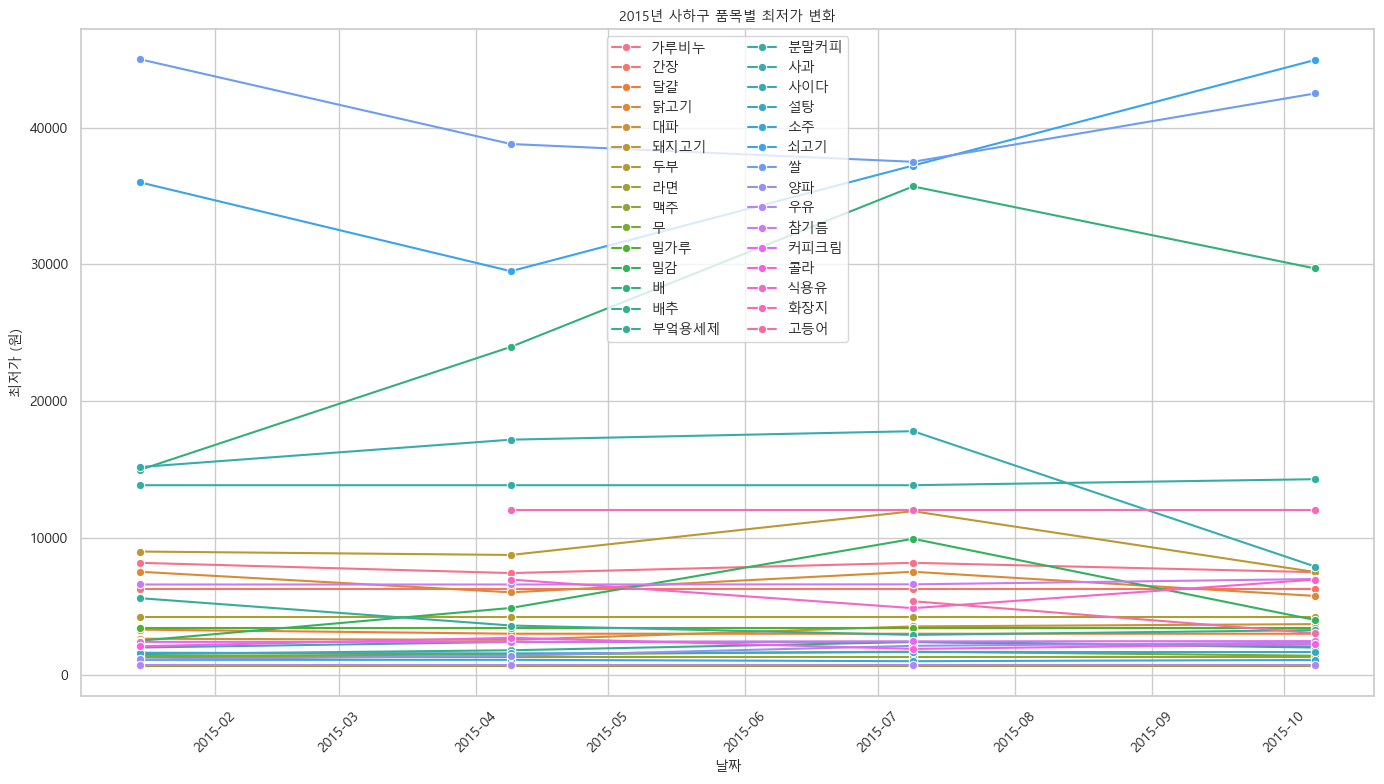

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2015ÎÖÑ ÏÇ¨ÌïòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÌïòÍµ¨2015_min.csv", index=False, encoding="utf-8-sig")

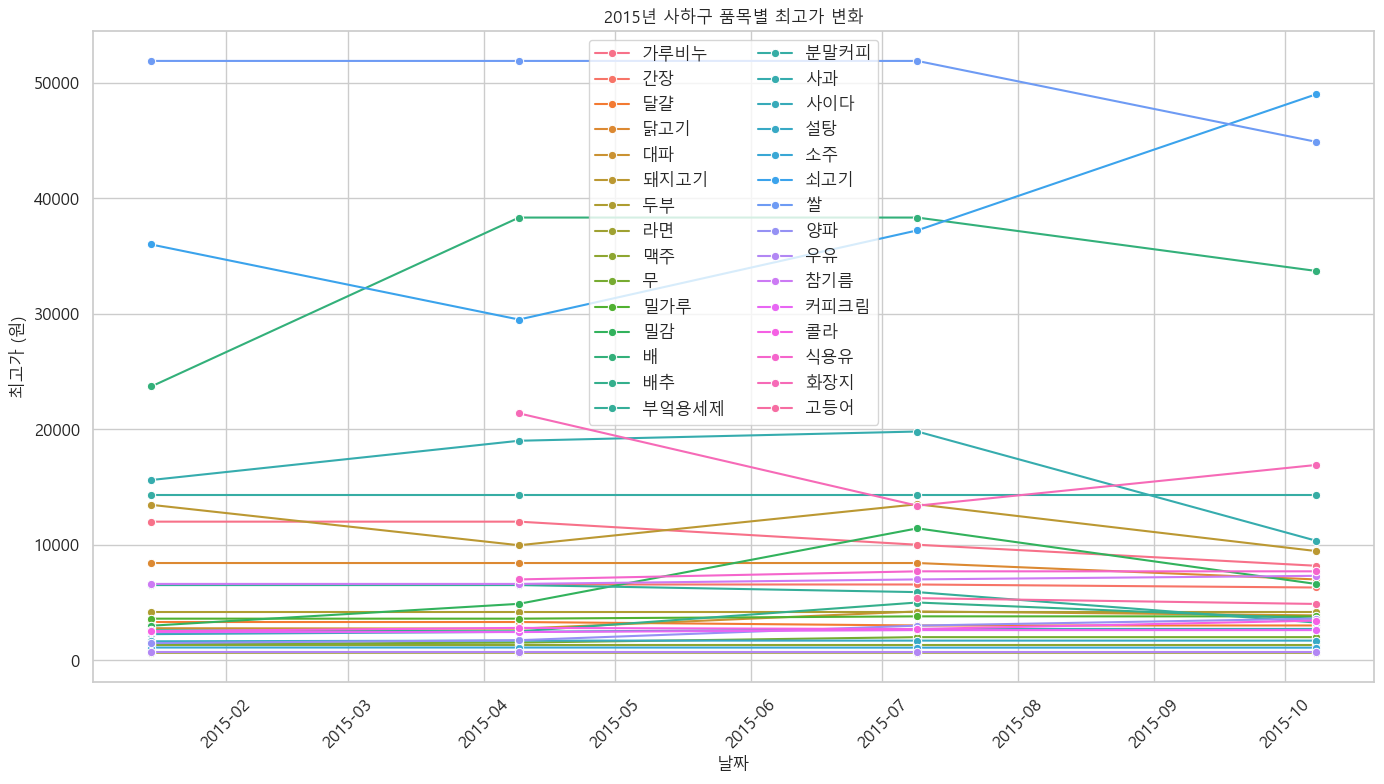

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2015_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2015ÎÖÑ ÏÇ¨ÌïòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÌïòÍµ¨2015_max.csv", index=False, encoding="utf-8-sig")